## Algoritmo de gradiente de descenso 

Es un algoritmo de optimización para encontrar el mínimo de una función. Se comienza con un punto aleatorio en la función y avanzamos en la dirección negativa del gradiente  para alcanzar los mínimos locales / globales.

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

### Dibujando funciones

In [2]:
delta = 0.1
    
def dibujo_superficies(f, x_min, x_max, y_min, y_max):
    
    x = np.arange(x_min, x_max + delta, delta)
    y = np.arange(y_min, y_max + delta, delta)
    X1, X2 = np.meshgrid(x, y)
    Z = np.array([f(z) for z in zip(X1.ravel(), X2.ravel())])
    Z = Z.reshape(len(x), len(y))
    plt.contourf(X1, X2, Z, 10, cmap=matplotlib.cm.bone, origin='lower', alpha=0.85)
    plt.colorbar()
    
def muestra_descenso(f, x_hist,f_hist):
    plt.subplot(1,2,1)
    X1,X2 = zip(*[(x[0], x[1]) for x in x_hist])
    
    dibujo_superficies(f, min(X1+X2)-1, max(X1+X2)+1, min(X1+X2)-1, max(X1+X2)+1)
    plt.plot(X1, X2, 'o-', markersize=10)
    
    plt.subplot(1,2,2)
    plt.plot(f_hist, 'rx-')
    plt.show()

### Pasos de algoritmo de gradiente descenso

Optimizaremos la función de costo.


* Inicializaremos $w[0], w[1], \dots w[n]$ con algún valor. En algunos caso, podríamos empezar con el valor de 0.

* Actualización interactiva:

    $$w[j] = w[j]- \alpha\frac{\partial}{\partial w[j]}J(w) $$
    
    hasta que converge.
    
* Este es el procedimiento. Aquí $\alpha$ es la velocidad de aprendizaje. Esta operación $\frac{\partial}{\partial w[j]}J(w)$ significa que estamos encontrando una derivada parcial del costo con respecto a cada $w[j]$. Esto se llama gradiente.

En el segundo paso estamos cambiando los valores de $w[j]$ en una dirección en la que se reduce la función de costos. Y el gradiente nos da la dirección en la que debemos movernos. Finalmente, alcanzaremos los mínimos de nuestra función de costos. Pero como no queremos cambiar drásticamente los valores de $w[j]$, porque podríamos perder los mínimos es el motivo por la que  necesitamos una tasa de aprendizaje.

In [3]:
def tam_paso(x,p,f,t,c, modo):
    '''escogemos un tamaño de paso. metodos diferentes:  const/sqrt(t)
                            const/t
                            linesearch
    '''                      
    if modo=="c/sqrt(t)":
        return c/np.sqrt(t+1)
    elif modo=="c":
        return c
    elif modo=="c/t":
        return c/(t+1)
    elif modo=="linesearch":
        alfa=1.0
        epsilon=10**(-6)
        gamma = 0.5
        fx = f(x)
        print("alfa", alfa)
        while f(x+alfa*p) > f(x) - epsilon and alfa > epsilon:
            alfa *= gamma
            print("alfa", alfa)
        
        return alfa
    else:
        assert 0, "no es compatible con el modo de tamaño de paso"+ modo

La optimización tiene muchas más aplicaciones avanzadas, como la ruta óptima para el transporte, la optimización del espacio de almacenamiento, etc.

Muchos algoritmos de machine learning dependen de técnicas de optimización tales como regresión lineal, vecinos más cercanos, redes neuronales, etc. Las aplicaciones de optimización no tienen límites y es un tema ampliamente investigado tanto en la academia como en la industria.

In [4]:
def gradienteDescenso(x_init, f, g, regla_='c/sqrt(t)', c=0.1 ,max_iters=1000, eps=10**(-6)):
    '''minimiza la funcion f con gradiente g'''
    x = x_inicial
    x_hist = [x]
    f_hist = [f(x)]
    hist_convergencia = []
    print ("iter",-1,'x=',x, 'f(x)=', f_hist[-1])
    for t in range(0,max_iters):
        p = -g(x) #escoge una interaccion
        alfa = tam_paso(x, p, f, t, c, regla_) #escogemos tamaño de psp
        
        if alfa == 0: #manipulacion de errores
            break
        
        print("iter",t,'x=',x, 'f(x)=', f(x), 'p=', p, 'alfa=', alfa)             
        x = x + alfa*p 
        
        x_hist.append(x) 
        f_hist.append(f(x)) #valor de la función de registro
        
        if np.linalg.norm(x - x_hist[-2]) < eps: #verificamos la convergencia
            break
            
    return x_hist, f_hist

Inicializamos una función y su gradiente :

In [5]:
f = lambda x: x[0]**2 + x[1]**2 + x[0]*x[1] + 3*x[0] + x[1]
g = lambda x: np.array([2*x[0] + x[1] + 3, 2*x[1] + x[0] + 1])
x_inicial = np.array([3,5])

Primero observamos un tamaño de paso constante (cambiamos c para tomar pasos más grandes o más pequeños). 

iter -1 x= [3 5] f(x)= 63
iter 0 x= [3 5] f(x)= 63 p= [-14 -14] alfa= 0.1
iter 1 x= [1.6 3.6] f(x)= 29.679999999999993 p= [-9.8 -9.8] alfa= 0.1
iter 2 x= [0.62 2.62] f(x)= 13.353199999999996 p= [-6.86 -6.86] alfa= 0.1
iter 3 x= [-0.066  1.934] f(x)= 5.353067999999999 p= [-4.802 -4.802] alfa= 0.1
iter 4 x= [-0.5462  1.4538] f(x)= 1.433003319999999 p= [-3.3614 -3.3614] alfa= 0.1
iter 5 x= [-0.88234  1.11766] f(x)= -0.48782837320000016 p= [-2.35298 -2.35298] alfa= 0.1
iter 6 x= [-1.117638  0.882362] f(x)= -1.429035902868 p= [-1.647086 -1.647086] alfa= 0.1
iter 7 x= [-1.2823466  0.7176534] f(x)= -1.8902275924053205 p= [-1.1529602 -1.1529602] alfa= 0.1
iter 8 x= [-1.39764262  0.60235738] f(x)= -2.1162115202786067 p= [-0.80707214 -0.80707214] alfa= 0.1
iter 9 x= [-1.47834983  0.52165017] f(x)= -2.226943644936518 p= [-0.5649505 -0.5649505] alfa= 0.1
iter 10 x= [-1.53484488  0.46515512] f(x)= -2.2812023860188932 p= [-0.39546535 -0.39546535] alfa= 0.1
iter 11 x= [-1.57439142  0.42560858] f(x)= 

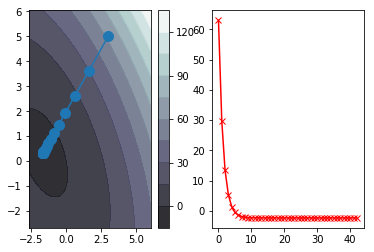

In [6]:
x_hist, f_hist = gradienteDescenso(x_inicial, f, g, regla_="c",c=0.1)
muestra_descenso(f,x_hist,f_hist)

Cambiamos la reglas para elegir el tamaño de paso.

iter -1 x= [3 5] f(x)= 63
iter 0 x= [3 5] f(x)= 63 p= [-14 -14] alfa= 1.0
iter 1 x= [-11.  -9.] f(x)= 259.0 p= [28. 28.] alfa= 0.5
iter 2 x= [3. 5.] f(x)= 63.0 p= [-14. -14.] alfa= 0.3333333333333333
iter 3 x= [-1.66666667  0.33333333] f(x)= -2.333333333333333 p= [-1.77635684e-15 -1.77635684e-15] alfa= 0.25


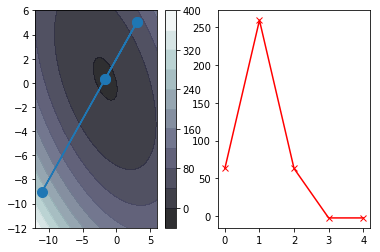

In [7]:
x_hist, f_hist = gradienteDescenso(x_inicial, f, g, regla_="c/t",c=1)
muestra_descenso(f,x_hist,f_hist)

iter -1 x= [3 5] f(x)= 63
iter 0 x= [3 5] f(x)= 63 p= [-14 -14] alfa= 0.1
iter 1 x= [1.6 3.6] f(x)= 29.679999999999993 p= [-9.8 -9.8] alfa= 0.07071067811865475
iter 2 x= [0.90703535 2.90703535] f(x)= 17.53849294696879 p= [-7.72110606 -7.72110606] alfa= 0.05773502691896258
iter 3 x= [0.46125709 2.46125709] f(x)= 11.250845184044708 p= [-6.38377126 -6.38377126] alfa= 0.05
iter 4 x= [0.14206852 2.14206852] f(x)= 7.481235645472303 p= [-5.42620557 -5.42620557] alfa= 0.044721359549995794
iter 5 x= [-0.10059877  1.89940123] f(x)= 5.024372678314393 p= [-4.6982037 -4.6982037] alfa= 0.040824829046386304
iter 6 x= [-0.29240213  1.70759787] f(x)= 3.3324757278945847 p= [-4.12279361 -4.12279361] alfa= 0.03779644730092272
iter 7 x= [-0.44822908  1.55177092] f(x)= 2.120437122797338 p= [-3.65531276 -3.65531276] alfa= 0.035355339059327376
iter 8 x= [-0.5774639  1.4225361] f(x)= 1.2257546530153178 p= [-3.26760829 -3.26760829] alfa= 0.03333333333333333
iter 9 x= [-0.68638418  1.31361582] f(x)= 0.5495279356

iter 220 x= [-1.66593943  0.33406057] f(x)= -2.3333317466936574 p= [-0.00218172 -0.00218172] alfa= 0.006726727939963125
iter 221 x= [-1.6659541  0.3340459] f(x)= -2.3333318100848754 p= [-0.0021377 -0.0021377] alfa= 0.006711560552140243
iter 222 x= [-1.66596845  0.33403155] f(x)= -2.3333318708075876 p= [-0.00209465 -0.00209465] alfa= 0.006696495301824251
iter 223 x= [-1.66598248  0.33401752] f(x)= -2.333331928980112 p= [-0.00205257 -0.00205257] alfa= 0.00668153104781061
iter 224 x= [-1.66599619  0.33400381] f(x)= -2.3333319847152407 p= [-0.00201143 -0.00201143] alfa= 0.006666666666666667
iter 225 x= [-1.6660096  0.3339904] f(x)= -2.333332038120517 p= [-0.0019712 -0.0019712] alfa= 0.006651901052377393
iter 226 x= [-1.66602271  0.33397729] f(x)= -2.333332089298489 p= [-0.00193187 -0.00193187] alfa= 0.00663723311599972
iter 227 x= [-1.66603553  0.33396447] f(x)= -2.3333321383469547 p= [-0.0018934 -0.0018934] alfa= 0.006622661785325219
iter 228 x= [-1.66604807  0.33395193] f(x)= -2.33333218

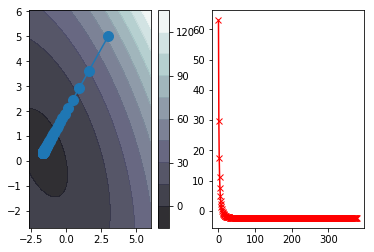

In [8]:
x_hist, f_hist = gradienteDescenso(x_inicial, f, g, regla_="c/sqrt(t)",c=0.1)
muestra_descenso(f,x_hist,f_hist)

Utilizamos una búsqueda de seguimiento con `linesearch`.

iter -1 x= [3 5] f(x)= 63
alfa 1.0
alfa 0.5
iter 0 x= [3 5] f(x)= 63 p= [-14 -14] alfa= 0.5
alfa 1.0
alfa 0.5
iter 1 x= [-4. -2.] f(x)= 14.0 p= [7. 7.] alfa= 0.5
alfa 1.0
alfa 0.5
iter 2 x= [-0.5  1.5] f(x)= 1.75 p= [-3.5 -3.5] alfa= 0.5
alfa 1.0
alfa 0.5
iter 3 x= [-2.25 -0.25] f(x)= -1.3125 p= [1.75 1.75] alfa= 0.5
alfa 1.0
alfa 0.5
iter 4 x= [-1.375  0.625] f(x)= -2.078125 p= [-0.875 -0.875] alfa= 0.5
alfa 1.0
alfa 0.5
iter 5 x= [-1.8125  0.1875] f(x)= -2.26953125 p= [0.4375 0.4375] alfa= 0.5
alfa 1.0
alfa 0.5
iter 6 x= [-1.59375  0.40625] f(x)= -2.3173828125 p= [-0.21875 -0.21875] alfa= 0.5
alfa 1.0
alfa 0.5
iter 7 x= [-1.703125  0.296875] f(x)= -2.329345703125 p= [0.109375 0.109375] alfa= 0.5
alfa 1.0
alfa 0.5
iter 8 x= [-1.6484375  0.3515625] f(x)= -2.33233642578125 p= [-0.0546875 -0.0546875] alfa= 0.5
alfa 1.0
alfa 0.5
iter 9 x= [-1.67578125  0.32421875] f(x)= -2.3330841064453125 p= [0.02734375 0.02734375] alfa= 0.5
alfa 1.0
alfa 0.5
iter 10 x= [-1.66210938  0.33789062] f(x)= -2

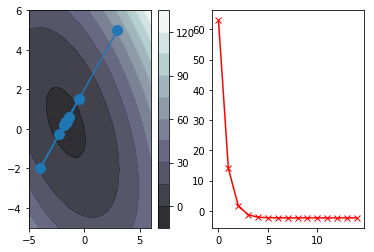

In [9]:
x_hist, f_hist = gradienteDescenso(x_inicial, f, g, regla_="linesearch",c=0.1)
muestra_descenso(f,x_hist,f_hist)

### Ejemplo


Usamos la función cuadrática: $f(x)= \frac{1}{2}x^TAx -b^Tx +c$ y evaluando $f^{'}(x) = 0$.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import itertools

In [22]:
A = np.matrix([[3.0, 2.0], [2.0, 6.0]])
b = np.matrix([[2.0], [-8.0]]) 
c = 0.0

In [23]:
def f(x, A, b, c):
    return float(0.5 * x.T * A * x - b.T * x + c)

Evaluamos la función en una cuadrícula y la dibujamos:


In [28]:
def grafico_ejemplo(A, b, c):
    fig = plt.figure(figsize=(10,8))
    qf = fig.gca(projection='3d')
    size = 20
    x1 = list(np.linspace(-6, 6, size))
    x2 = list(np.linspace(-6, 6, size))
    x1, x2 = np.meshgrid(x1, x2)
    zs = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            x = np.matrix([[x1[i,j]], [x2[i,j]]])
            zs[i,j] = f(x, A, b, c)
    qf.plot_surface(x1, x2, zs, rstride=1, cstride=1, cmap=plt.cm.RdYlGn, linewidth=0)
    return x1, x2, zs

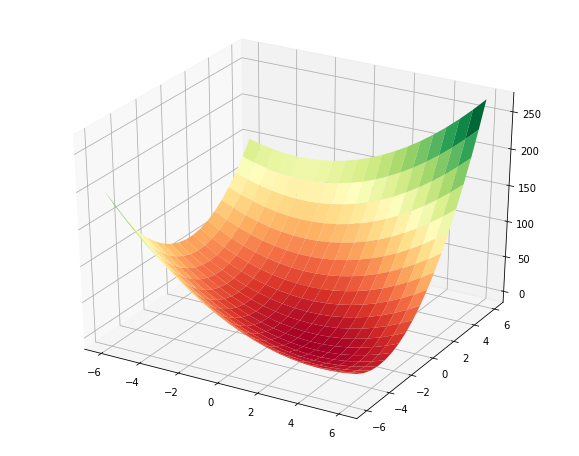

In [29]:
x1, x2, zs = grafico_ejemplo(A, b, c)

In [32]:
def pasos_contorno(x1, x2, zs, pasos=None):
    fig = plt.figure(figsize=(6,6))
    cp = plt.contour(x1, x2, zs, 10)
    plt.clabel(cp, inline=1, fontsize=10)
    if pasos is not None:
        pasos = np.matrix(pasos)
        plt.plot(pasos[:,0], pasos[:,1], '-o')

Gráfico de contorno de la misma forma cuadrática:

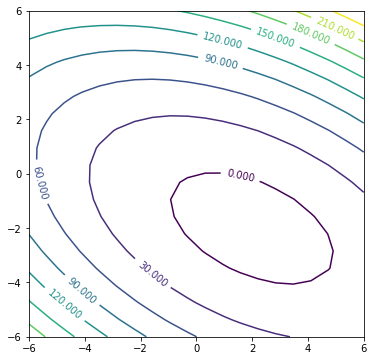

In [33]:
pasos_contorno(x1, x2, zs)

#### El método de pasos de descenso

In [34]:
x = np.matrix([[-2.0],[-2.0]])
pasos = [(-2.0, -2.0)]
i = 0
imax = 10
eps = 0.01
r = b - A * x
delta = r.T * r
delta0 = delta
while i < imax and delta > eps**2 * delta0:
    alpha = float(delta / (r.T * (A * r)))
    x = x + alpha * r
    pasos.append((x[0,0], x[1,0])) 
    r = b - A * x
    delta = r.T * r
    i += 1

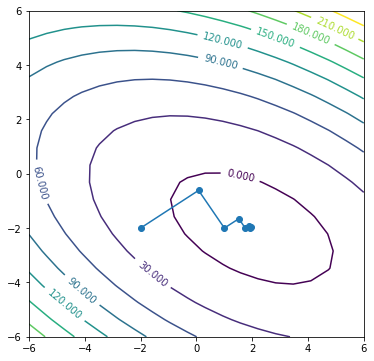

In [35]:
pasos_contorno(x1, x2, zs, pasos)

Visualizamos varias cosas que juegan un papel allí. Primero inicializamos el punto de partida y pocos parámetros:

In [36]:
x = np.matrix([[-2.0],[-2.0]])
pasos = [(-2.0, -2.0)]
i = 0
imax = 10
eps = 0.01

El primer objeto para mirar es residuo denotado por `r` en el código, veamos qué significa exactamente:

b:
 [[ 2.]
 [-8.]]
A:
 [[3. 2.]
 [2. 6.]]
x:
 [[-2.]
 [-2.]]
r:
 [[12.]
 [ 8.]]


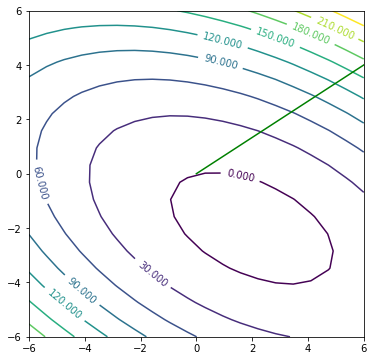

In [37]:
print('b:\n', b)
print ('A:\n', A)
print ('x:\n', x)
r = b - A * x
print ('r:\n', r)
pasos_contorno(x1, x2, zs, None)
plt.plot([0, r[0, 0] * 0.5], [0, r[1, 0] * 0.5], 'g')
plt.show()

El residual en realidad significa dirección de paso de descenso.

In [45]:
print('||r||^2 =', np.linalg.norm(r)**2)
delta = r.T * r
print ('r.T * r = ',  delta)
delta0 = delta

||r||^2 = 207.98621801658558
r.T * r =  [[207.98621802]]


Ahora tenemos la dirección, la siguiente pregunta es qué tan lejos debemos avanzar en esa dirección. El procedimiento para responder se llama búsqueda lineal y su tarea es tomar la dirección y encontrar el punto mínimo de la parábola formada por esta alineación y la forma cuadrática.


In [46]:
alfa = float(delta / (r.T * A * r))

Ahora que sabemos qué tan lejos va `r` y actualizamos la solución x:

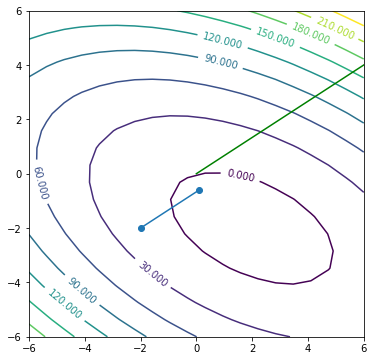

In [47]:
x = x + alfa* r
pasos_contorno(x1, x2, zs, [(-2, -2), (x[0, 0], x[1, 0])])
plt.plot([0, r[0, 0] * 0.5], [0, r[1, 0] * 0.5], 'g')
plt.show()

Y ahora el ciclo se repite: estamos en algún lugar, computamos el residuo, tomamos la dirección:

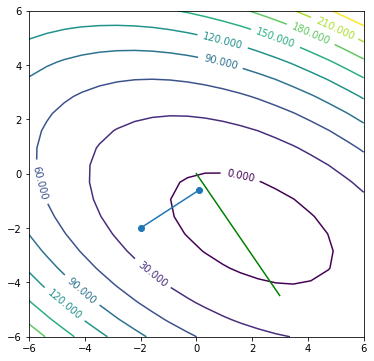

In [48]:
r = b - A * x
pasos_contorno(x1, x2, zs, [(-2, -2), (x[0, 0], x[1, 0])])
plt.plot([0, r[0, 0]], [0, r[1, 0]], 'g')

Se actualice el delta y el contador de la iteración y estamos listos para realizar la siguiente búsqueda lineal y dar el siguiente paso.

In [49]:
delta = r.T * r
i += 1

Es interesante comparar el descenso más pronunciado que generalmente llamamos descenso de gradiente donde, en lugar de realizar una búsqueda lineal, fijamos la velocidad alfa (tasa de aprendizaje) en un parámetro fijo:


In [50]:
x = np.matrix([[-2.0],[-2.0]])
pasos= [(-2.0, -2.0)]
i = 0
imax = 10000
eps = 0.01
alfa = 0.12 
r = b - A * x
delta = r.T * r
delta0 = delta
while i < imax and delta > eps**2 * delta0:
    x = x + alfa * r
    pasos.append((x[0,0], x[1,0]))  
    r = b - A * x
    delta = r.T * r
    i += 1

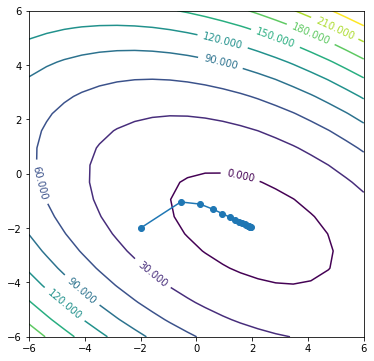

In [51]:
pasos_contorno(x1, x2, zs, pasos)